In [82]:
import pandas as pd
import env 
import acquire as ac
import prepare as py 

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import \
accuracy_score,\
recall_score,\
precision_score,\
confusion_matrix,\
classification_report


# Decision Tree Exercise 

## Using the titanic data, in your classification-exercises repository, 

## create a notebook, decision_tree.ipynb where you will do the following:



In [96]:
titanic = ac.get_titanic_data()
titanic = py.prep_titanic(titanic)
titanic = titanic.drop(columns=['deck', 'embark_town', 'class', 'age'])
titanic['embarked'] = titanic['embarked'].fillna('S')    



### What is your baseline prediction? 

### What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [97]:
titanic.sample(4)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
438,438,0,1,male,1,4,263.0000,S,0,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1
66,66,1,2,female,0,0,10.5000,S,1,0,0,1
490,490,0,3,male,1,0,19.9667,S,0,1,0,1


In [98]:
titanic['lable'] = titanic.survived == True


In [99]:
titanic.lable.value_counts()

lable
False    549
True     342
Name: count, dtype: int64

In [100]:
train, validate, test = py.split_titanic_data(titanic)


print(f'train titanic data -> {train.shape}')
print(f'validate titanic data -> {validate.shape}')
print(f'test titanic data -> {test.shape}')

train titanic data -> (498, 13)
validate titanic data -> (214, 13)
test titanic data -> (179, 13)


In [101]:
train = train.drop(columns=['sex', 'embarked'])
validate = validate.drop(columns=['sex', 'embarked'])
test = test.drop(columns=['sex', 'embarked'])


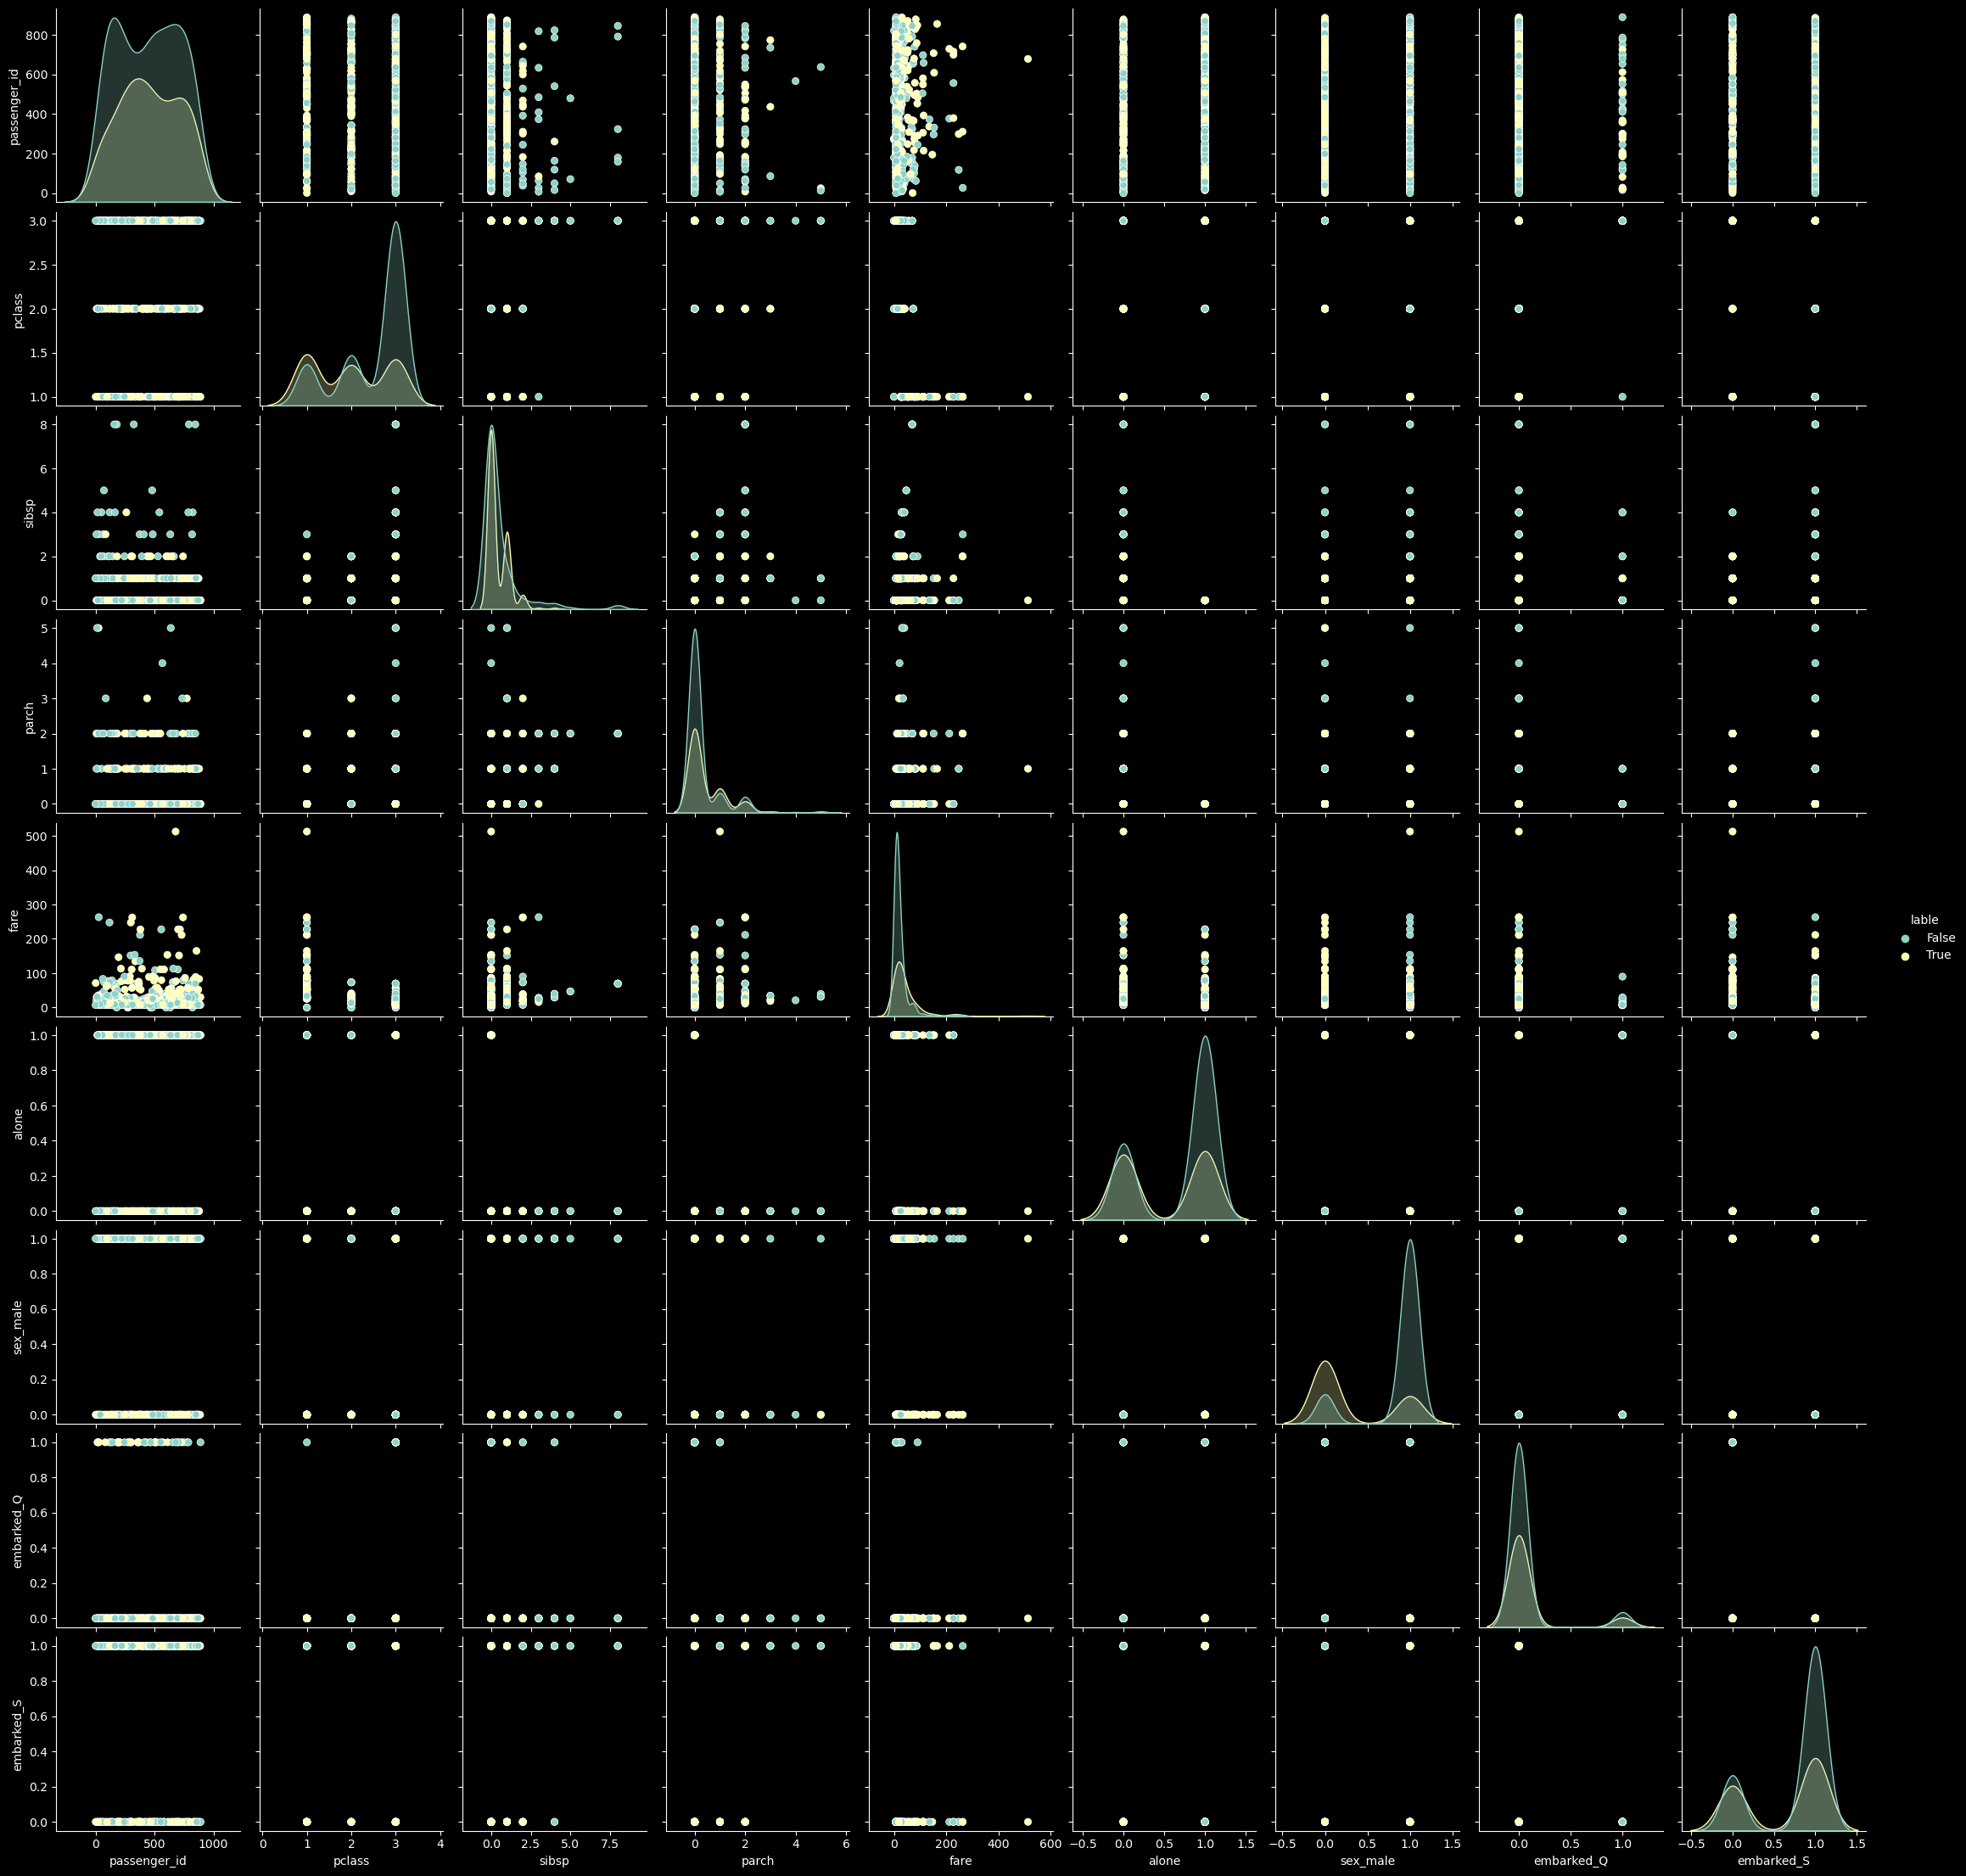

In [102]:
# to get a pairplot with associations
# first, remember I have both species and label here
# lets not sully that with both targets
sns.pairplot(
    data=train.drop(columns='survived'),
    hue='lable')

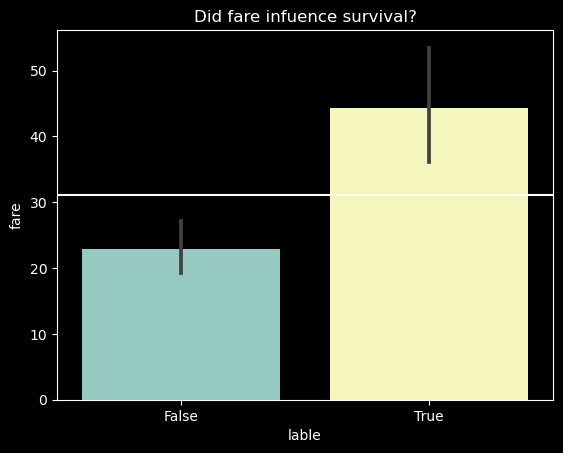

In [103]:
# Lets ask: Did fare impact survival?
# examine visually:
sns.barplot(
    data=train,
    x='lable',
    y='fare')
plt.title('Did fare infuence survival?')
average_fare = train.fare.mean()
plt.axhline(average_fare, label="Average Fare")
plt.show()

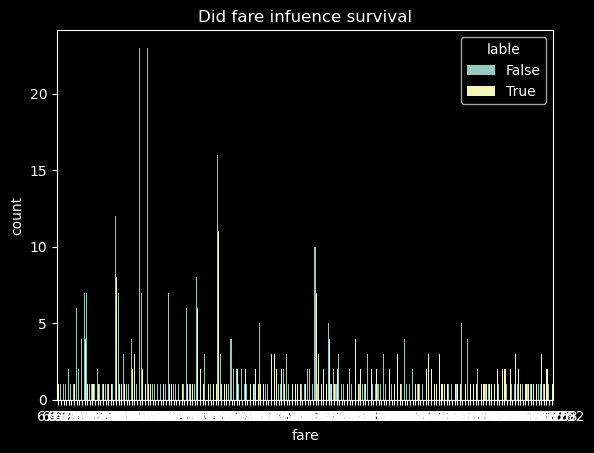

In [104]:
sns.countplot(data = train, x= 'fare', hue = 'lable')
plt.title('Did fare infuence survival')
plt.show()

<Axes: xlabel='fare', ylabel='lable'>

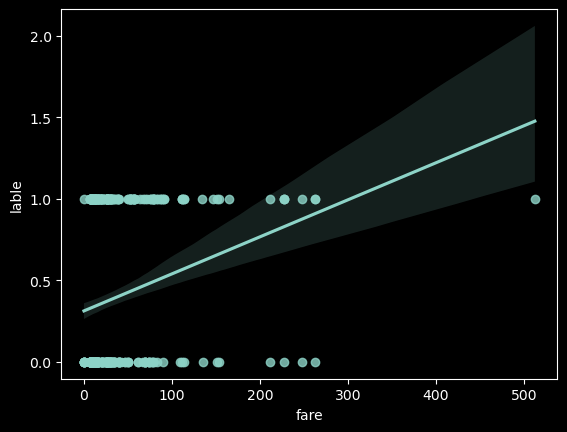

In [105]:
sns.regplot(x='fare', y='lable', data=train)

In [106]:
# null: fair and survival are indepdent of eachother
# alt: fair and survival have a dependent distribution

alpha = 0.05

observed = pd.crosstab(train.fare, train.lable)
observed

lable,False,True
fare,,
0.0000,7,1
6.4375,1,0
6.4500,1,0
6.4958,1,0
6.7500,2,0
...,...,...
227.5250,1,3
247.5208,1,1
262.3750,0,2


In [107]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'Chi2 -> {chi2}')
print(f'P-value -> {p}')

Chi2 -> 279.8147670813935
P-value -> 1.5752234609735892e-05


In [108]:
if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [109]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)


In [110]:
train.sample(3)

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S,lable
247,247,1,2,0,2,14.5000,0,0,0,1,True
22,22,1,3,0,0,8.0292,1,0,1,0,True
625,625,0,1,0,0,32.3208,1,1,0,1,False


In [111]:
# fitting:
# define X and y:
# inside train: everything but the label and the species
X_train = train.drop(columns=['survived', 'lable'])
y_train = train[['lable']]
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [112]:
# use the thing!
model_1_preds = clf.predict(X_train)

In [113]:
# how well did this thing work?
accuracy_score(y_train, model_1_preds)

0.821285140562249

In [114]:
# lets see how it did on validation:
# separate our y and x for validation:
X_val = validate.drop(columns=['survived','lable'])
y_val = validate.lable

In [115]:
model_1_val_preds = clf.predict(X_val)

In [117]:
accuracy_score(# reals:
    y_val,
    # preds:
    model_1_val_preds)

0.7757009345794392

In [118]:
clf.score(X_train, y_train)


0.821285140562249

In [119]:
confusion_matrix(y_train, model_1_preds)


array([[274,  33],
       [ 56, 135]])

In [120]:
pd.DataFrame(
    confusion_matrix(y_train, model_1_preds),
    columns=['pred_0', 'pred_1'],
    index=['actual_0', 'actual_1'])

,pred_0,pred_1
actual_0,274,33
actual_1,56,135


In [121]:
print(classification_report(y_train, model_1_preds))


              precision    recall  f1-score   support

       False       0.83      0.89      0.86       307
        True       0.80      0.71      0.75       191

    accuracy                           0.82       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



In [124]:
pd.DataFrame(
    classification_report(y_train, 
                      model_1_preds,
                     output_dict=True)).T

,precision,recall,f1-score,support
False,0.830303,0.892508,0.860283,307.000000
True,0.803571,0.706806,0.752089,191.000000
accuracy,0.821285,0.821285,0.821285,0.821285
macro avg,0.816937,0.799657,0.806186,498.000000
weighted avg,0.820051,0.821285,0.818787,498.000000


In [ ]:
# lets make a model
# with limited depth
# and do not show it 
clf_1 = DT(max_depth=2)